In [8]:
import numpy as np
import pandas as pd


train = pd.read_csv('./data/predict-student-performance-from-game-play/train.csv')
print(train.shape)
merp = train.head(50)
print(merp.shape)
merp.head()

(26296946, 20)
(50, 20)


,session_id,index,elapsed_time,event_name,name,level,page,room_coor_x,room_coor_y,screen_coor_x,screen_coor_y,hover_duration,text,fqid,room_fqid,text_fqid,fullscreen,hq,music,level_group
0,20090312431273200,0,0,cutscene_click,basic,0,NaN,-413.991405,-159.314686,380.0,494.0,NaN,undefined,intro,tunic.historicalsociety.closet,tunic.historicalsociety.closet.intro,0,0,1,0-4
1,20090312431273200,1,1323,person_click,basic,0,NaN,-413.991405,-159.314686,380.0,494.0,NaN,"Whatcha doing over there, Jo?",gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4
2,20090312431273200,2,831,person_click,basic,0,NaN,-413.991405,-159.314686,380.0,494.0,NaN,Just talking to Teddy.,gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4
3,20090312431273200,3,1147,person_click,basic,0,NaN,-413.991405,-159.314686,380.0,494.0,NaN,I gotta run to my meeting!,gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4
4,20090312431273200,4,1863,person_click,basic,0,NaN,-412.991405,-159.314686,381.0,494.0,NaN,"Can I come, Gramps?",gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4


In [17]:
labels = pd.read_csv('./data/predict-student-performance-from-game-play/train_labels.csv')
print(labels.shape)
labels.head()

tlabels = labels.head(50)
tlabels = tlabels.drop(columns=['session_id'])
print(tlabels.shape)
tlabels.head()

(424116, 2)
(50, 1)


,correct
0,1
1,0
2,1
3,0
4,1


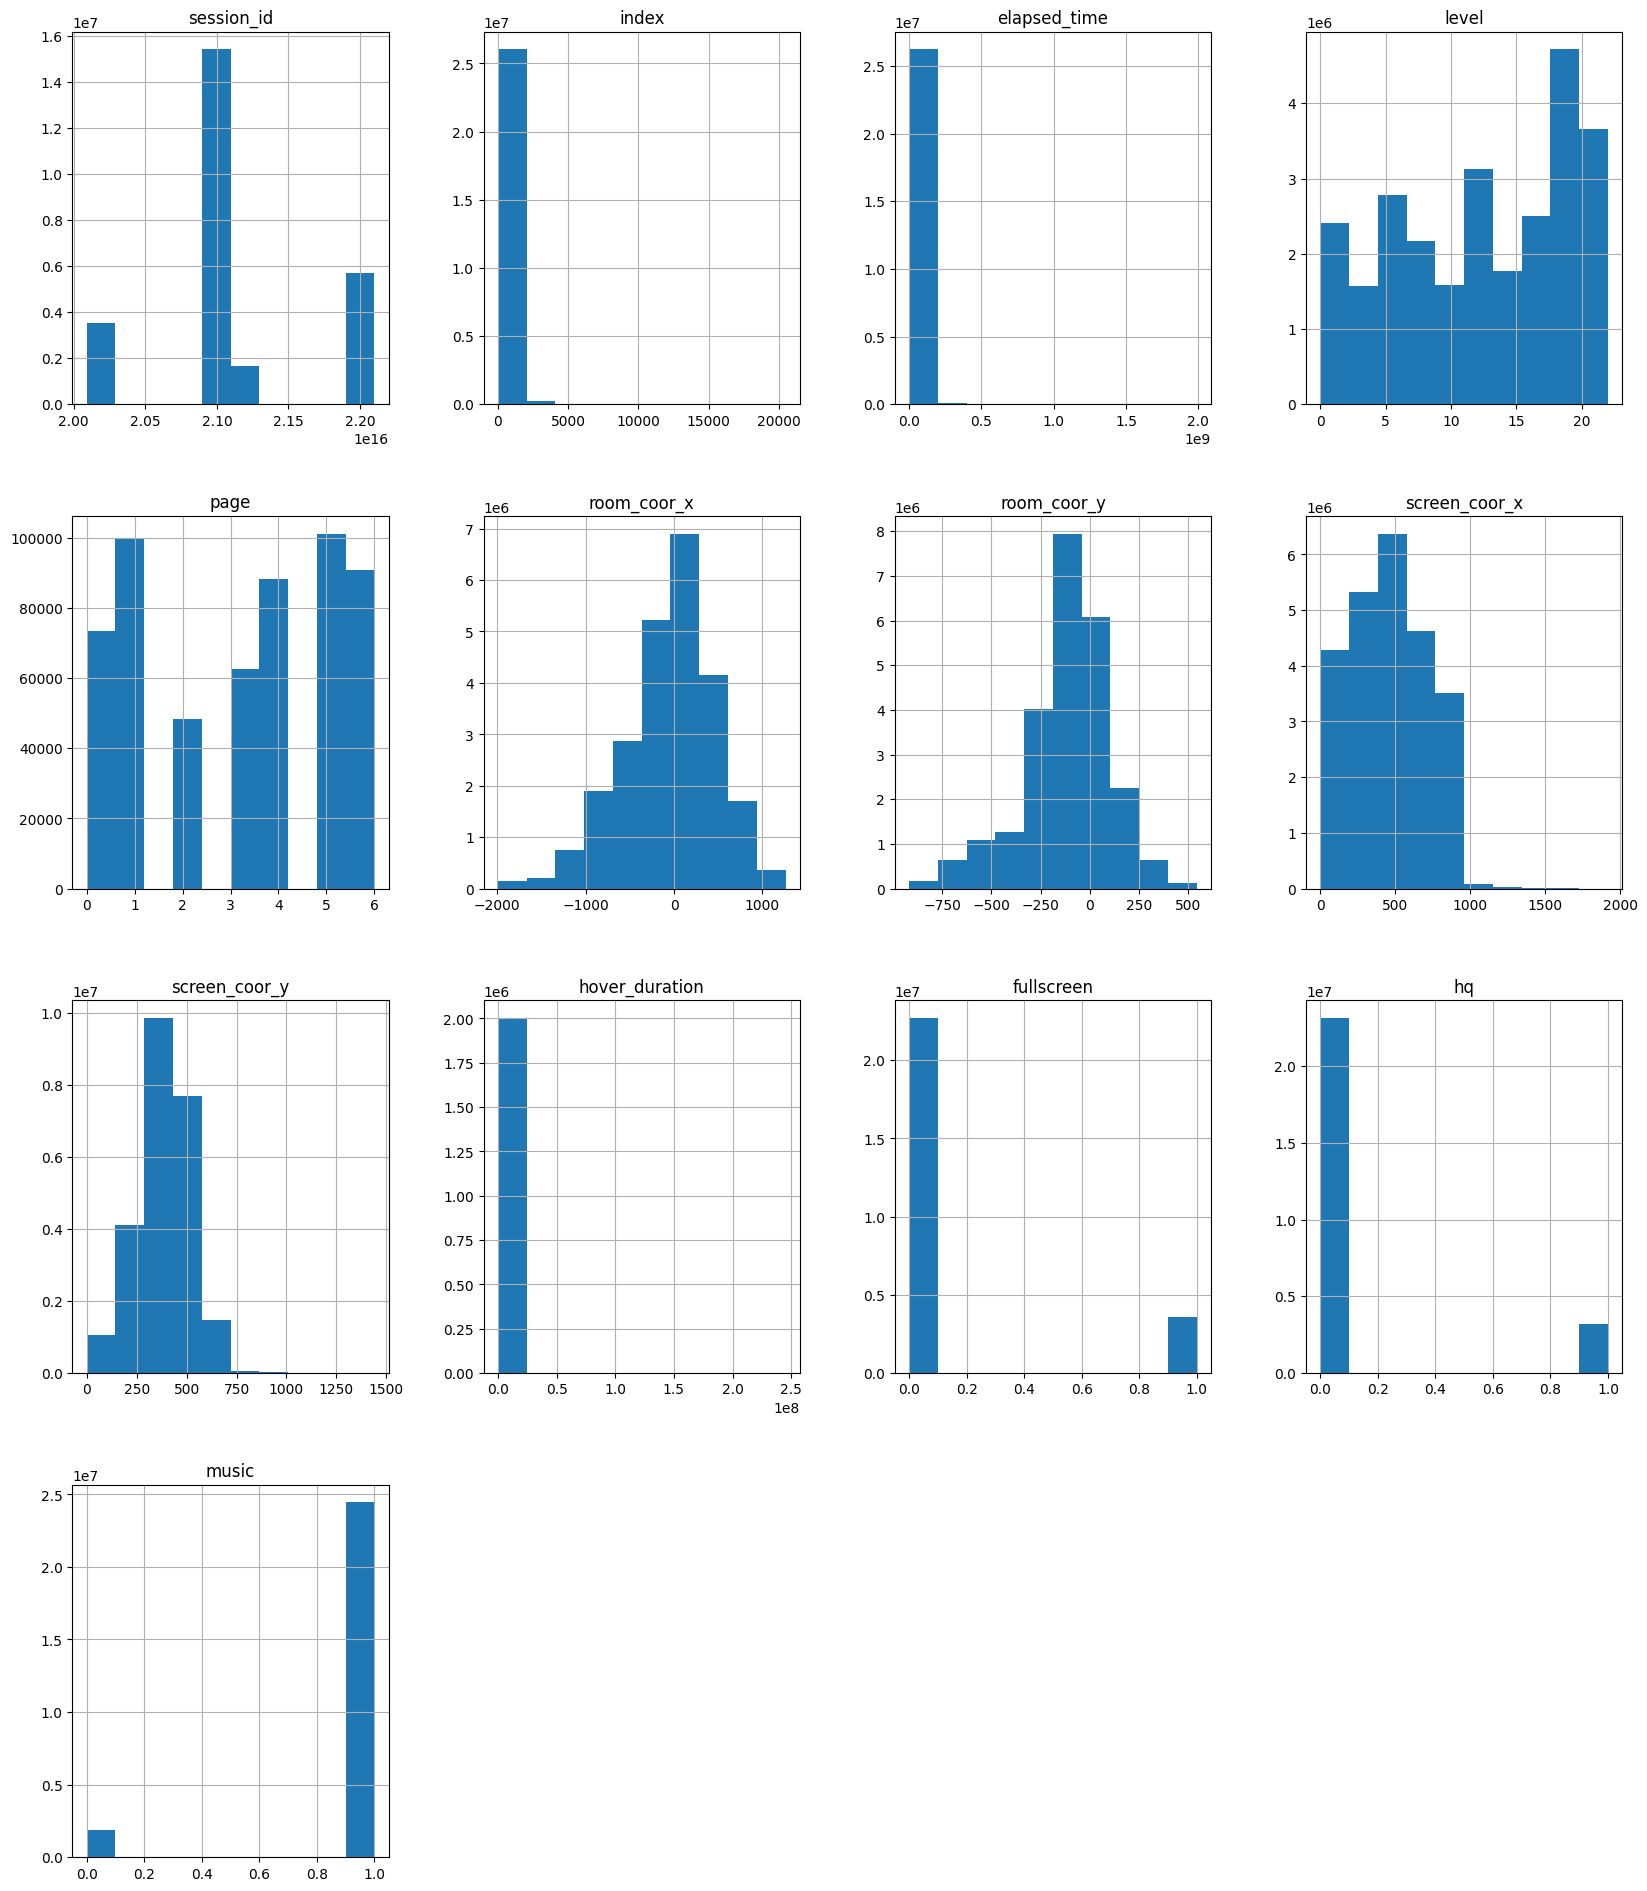

In [24]:
cols = ['session_id', 'index', 'elapsed_time', 'event_name', 'name', 'level', 'page', 
            'room_coor_x', 'room_coor_y', 'screen_coor_x', 'screen_coor_y', 'hover_duration', 
            'text', 'fqid', 'room_fqid', 'text_fqid', 'fullscreen', 'hq', 'music', 'level_group']
categorical_features = ['event_name', 'name','text', 'fqid', 'room_fqid', 'text_fqid','level_group']
numeric_features = [col for col in merp.columns if col not in categorical_features]


shown = train[numeric_features].hist(figsize=(20,30), layout=(5,4))

In [28]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown='ignore')
X = merp
enc.fit(X)


OneHotEncoder(handle_unknown='ignore')